In [1]:
import networkx as nx
import pygraphviz as pgv
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'


G = nx.Graph()
G.add_edges_from([(1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'c'), (2, 'e'), (3, 'b'),
                  (3, 'c'), (3, 'd'), (4, 'a'), (4, 'e'), (5, 'a'), (5, 'e')])

In [2]:
if nx.bipartite.is_bipartite(G):
    left, right = nx.bipartite.sets(G)
    for v in left:
        G.node[v]['color'] = 'blue'
    for v in right:
        G.node[v]['color'] = 'green'
else:
    print("This graph is not bipartite")

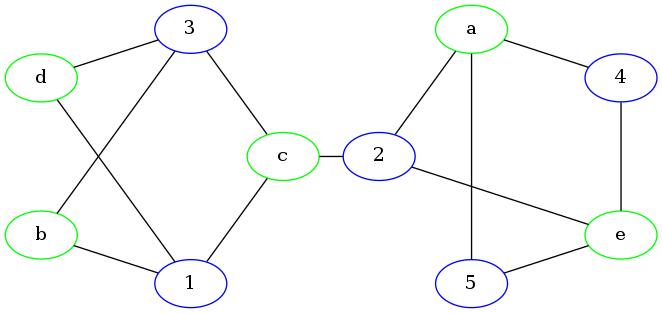

In [3]:
draw(G, layout='circo')

{5: 'a', 'a': 5, 4: 'e', 'e': 4, 3: 'b', 'b': 3, 2: 'c', 'c': 2, 'd': 1, 1: 'd'}


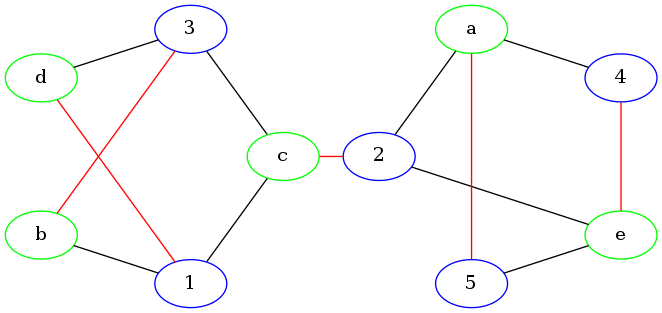

In [4]:
M = nx.max_weight_matching(G)
print(M)
for v1, v2 in M.items():
    G[v1][v2]['color'] = 'red'
draw(G, layout='circo')

## New 

In [1]:
import networkx as nx
import pygraphviz as pgv
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'


G = nx.Graph()
G.add_edges_from([(1, 'b'), (1, 'c'), (1, 'd'), (2, 'a'), (2, 'c'), (2, 'e'), (3, 'b'),
                  (3, 'c'), (3, 'd'), (4, 'a'), (4, 'e'), (5, 'a'), (5, 'e')])

In [7]:
if nx.bipartite.is_bipartite(G):
    left, right = nx.bipartite.sets(G)
    for v in left:
        G.nodes[v]['color'] = 'blue'
    for v in right:
        G.nodes[v]['color'] = 'green'
else:
    print("This graph is not bipartite")

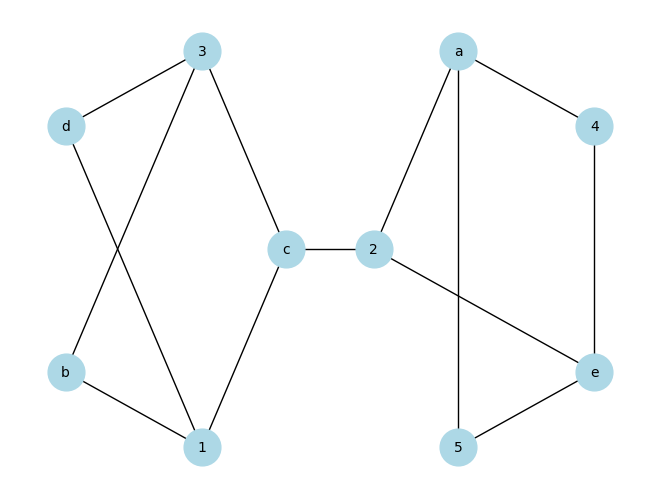

In [11]:
import pygraphviz as pgv
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt

pos = graphviz_layout(G, prog='circo')
nx.draw(G, pos, with_labels=True, node_size=700, node_color="lightblue", font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

{('d', 1), (5, 'a'), (2, 'c'), (4, 'e'), (3, 'b')}


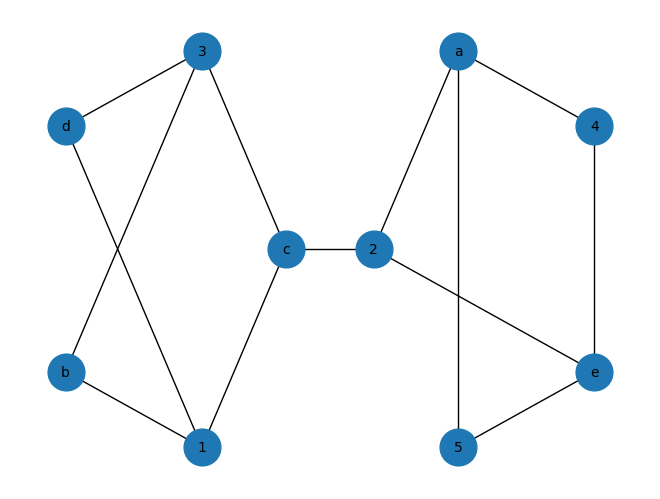

In [17]:
M = nx.max_weight_matching(G)
print(M)
for v1, v2 in M:
    G[v1][v2]['color'] = 'red'
pos = graphviz_layout(G, prog='circo')
nx.draw(G, pos, with_labels=True, node_size=700, font_size=10)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()

Maximum Weight Matching: {('d', 1), (5, 'a'), (2, 'c'), (4, 'e'), (3, 'b')}


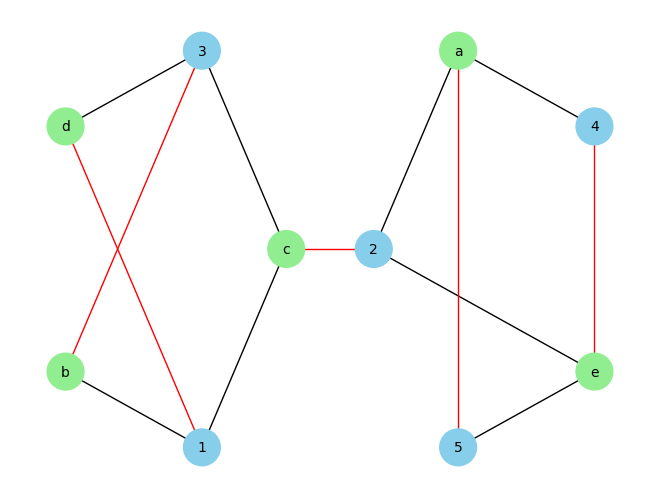

In [28]:
left_nodes, right_nodes = nx.bipartite.sets(G)

# Find the maximum weight matching
M = nx.max_weight_matching(G, maxcardinality=True)
print("Maximum Weight Matching:", M)

# Set the edge color for matched edges to red
for v1, v2 in M:
    G[v1][v2]['color'] = 'red'

# Set the edge color for other edges to black
for u, v, data in G.edges(data=True):
    if 'color' not in data:
        data['color'] = 'black'

# Get positions for all nodes using the Graphviz layout
pos = graphviz_layout(G, prog='circo')

# Draw the graph with node labels and edge colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
node_colors = ['skyblue' if n in left_nodes else 'lightgreen' for n in G.nodes()]
nx.draw(G, pos, with_labels=True, edge_color=edge_colors, node_color=node_colors, node_size=700, font_size=10)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.show()

In [27]:
G[1]

AtlasView({'b': {'color': 'black'}, 'c': {'color': 'black'}, 'd': {'color': 'red'}})

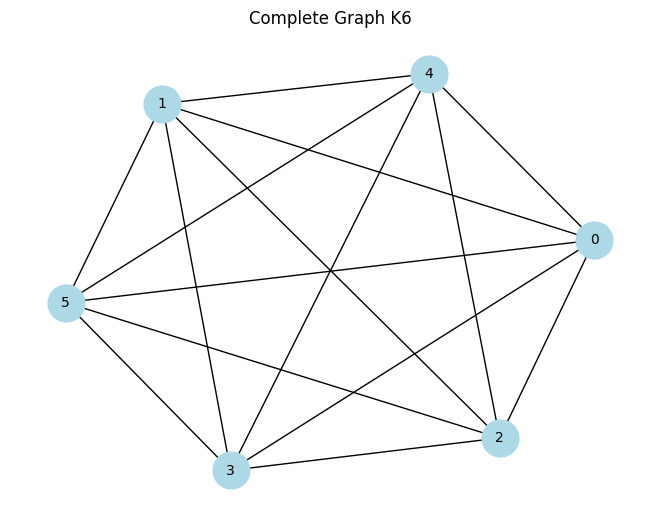

In [29]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a complete graph K6
G = nx.complete_graph(6)

# Draw the graph
pos = nx.spring_layout(G)  # Use spring layout for better visualization
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
plt.title("Complete Graph K6")
plt.show()
    

In [33]:
nx.check_planarity(G)

(False, None)

## Konig's Theorem

Maximum Matching: {'C': 3, 'B': 2, 'A': 1, 1: 'A', 2: 'B', 3: 'C'}
Minimum Vertex Cover: {'C', 'B', 'A'}
Size of Maximum Matching: 3
Size of Minimum Vertex Cover: 3


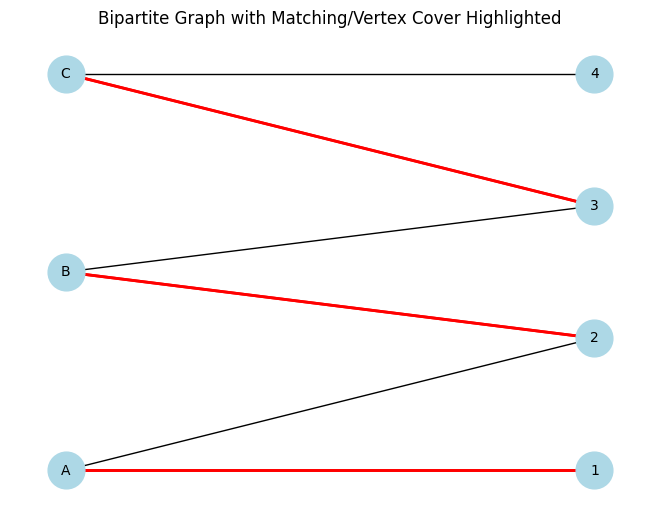

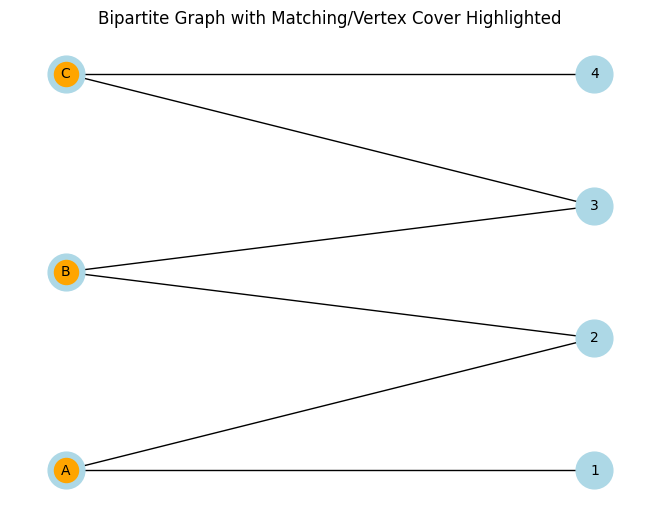

In [36]:
import networkx as nx

# Create a bipartite graph
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(['A', 'B', 'C'], bipartite=0)
B.add_nodes_from([1, 2, 3, 4], bipartite=1)
# Add edges
B.add_edges_from([
    ('A', 1), ('A', 2),
    ('B', 2), ('B', 3),
    ('C', 3), ('C', 4)
])

# Find the maximum matching
max_matching = nx.bipartite.maximum_matching(B, top_nodes={'A', 'B', 'C'})
print("Maximum Matching:", max_matching)

# Function to derive minimum vertex cover from maximum matching
def minimum_vertex_cover_from_matching(B, max_matching, top_nodes):
    # Initialize sets
    unmatched_top_nodes = {node for node in top_nodes if node not in max_matching}
    matched_edges = {(u, v) for u, v in max_matching.items() if u in top_nodes}

    # Use DFS to find vertices reachable from unmatched top nodes
    visited_top = set()
    visited_bottom = set()
    
    def dfs(v, is_top):
        if is_top:
            if v in visited_top:
                return
            visited_top.add(v)
            for u in B.neighbors(v):
                if (v, u) not in matched_edges and (u, v) not in matched_edges:
                    dfs(u, False)
        else:
            if v in visited_bottom:
                return
            visited_bottom.add(v)
            for u in B.neighbors(v):
                if (v, u) in matched_edges or (u, v) in matched_edges:
                    dfs(u, True)
    
    for node in unmatched_top_nodes:
        dfs(node, True)
    
    # Minimum vertex cover
    vertex_cover = (top_nodes - visited_top).union(visited_bottom)
    return vertex_cover

# Find the minimum vertex cover
top_nodes = {'A', 'B', 'C'}
min_vertex_cover = minimum_vertex_cover_from_matching(B, max_matching, top_nodes)
print("Minimum Vertex Cover:", min_vertex_cover)

# Sizes
print("Size of Maximum Matching:", len(max_matching) // 2)
print("Size of Minimum Vertex Cover:", len(min_vertex_cover))

# Visualization function
import matplotlib.pyplot as plt

def draw_bipartite_graph(B, matching=None, vertex_cover=None):
    pos = nx.bipartite_layout(B, nodes=['A', 'B', 'C'])
    nx.draw(B, pos, with_labels=True, node_color='lightblue', node_size=700, font_size=10)
    if matching:
        matching_edges = [(u, v) for u, v in matching.items() if u in pos and v in pos]
        nx.draw_networkx_edges(B, pos, edgelist=matching_edges, edge_color='red', width=2)
    if vertex_cover:
        cover_nodes = list(vertex_cover)
        nx.draw_networkx_nodes(B, pos, nodelist=cover_nodes, node_color='orange')
    plt.title("Bipartite Graph with Matching/Vertex Cover Highlighted")
    plt.show()

# Draw the graph with maximum matching highlighted
draw_bipartite_graph(B, matching=max_matching)

# Draw the graph with minimum vertex cover highlighted
draw_bipartite_graph(B, vertex_cover=min_vertex_cover)
